In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
%matplotlib inline

# PROBLEM 1

Read IMUdata using pandas dataframe

In [2]:
imu_data = pd.read_csv('IMUData.csv')

In [3]:
imu_data.head()

,time,gyroscope.X,gyroscope.Y,gyroscope.Z,accelerometer.X,accelerometer.Y,accelerometer.Z,magnetometer.X,magnetometer.Y,magnetometer.Z
0,0.000000,-0.9375,-1.250,0.875,0.019043,-0.052246,0.97803,0.20996,0.031250,-0.44873
1,0.003906,-0.9375,-1.250,0.875,0.019043,-0.052246,0.97803,0.20996,0.031250,-0.44873
2,0.007812,-0.9375,-1.875,0.250,0.019043,-0.067871,0.99756,0.20996,0.031250,-0.44873
3,0.011719,-1.3125,-2.000,0.125,0.026855,-0.032715,0.98975,0.21484,0.041016,-0.45361
4,0.015625,-1.7500,-2.125,0.000,0.003418,-0.032715,0.99365,0.21484,0.041016,-0.45361


In [4]:
imu_data.columns

Index(['time', ' gyroscope.X', ' gyroscope.Y', ' gyroscope.Z',
       ' accelerometer.X', ' accelerometer.Y', ' accelerometer.Z',
       ' magnetometer.X', ' magnetometer.Y', ' magnetometer.Z '],
      dtype='object')

## Gyroscope data

In [5]:
gyroscope_data = imu_data[['time', ' gyroscope.X', ' gyroscope.Y', ' gyroscope.Z']].rename(columns = {' gyroscope.X':'x', ' gyroscope.Y':'y', ' gyroscope.Z':'z'})

In [6]:
gyroscope_data.head()

,time,x,y,z
0,0.000000,-0.9375,-1.250,0.875
1,0.003906,-0.9375,-1.250,0.875
2,0.007812,-0.9375,-1.875,0.250
3,0.011719,-1.3125,-2.000,0.125
4,0.015625,-1.7500,-2.125,0.000


## Accelerometer data

In [7]:
accelerometer_data = imu_data[['time', ' accelerometer.X', ' accelerometer.Y', ' accelerometer.Z']].rename(columns = {' accelerometer.X':'x', ' accelerometer.Y':'y', ' accelerometer.Z':'z'})

In [8]:
accelerometer_data.head()

,time,x,y,z
0,0.000000,0.019043,-0.052246,0.97803
1,0.003906,0.019043,-0.052246,0.97803
2,0.007812,0.019043,-0.067871,0.99756
3,0.011719,0.026855,-0.032715,0.98975
4,0.015625,0.003418,-0.032715,0.99365


## Magnetometer data

In [9]:
magnetometer_data = imu_data[['time', ' magnetometer.X', ' magnetometer.Y', ' magnetometer.Z ']].rename(columns = {' magnetometer.X':'x', ' magnetometer.Y':'y', ' magnetometer.Z ':'z'})

In [10]:
magnetometer_data.head()

,time,x,y,z
0,0.000000,0.20996,0.031250,-0.44873
1,0.003906,0.20996,0.031250,-0.44873
2,0.007812,0.20996,0.031250,-0.44873
3,0.011719,0.21484,0.041016,-0.45361
4,0.015625,0.21484,0.041016,-0.45361


## Convert rotational rate from degrees/sec to radians/sec

In [11]:
def deg2radians(data):
    data = data.copy()
    data[['x', 'y', 'z']] = np.radians(data[['x', 'y', 'z']])
    return data

In [12]:
deg2radians(gyroscope_data).head()

,time,x,y,z
0,0.000000,-0.016362,-0.021817,0.015272
1,0.003906,-0.016362,-0.021817,0.015272
2,0.007812,-0.016362,-0.032725,0.004363
3,0.011719,-0.022907,-0.034907,0.002182
4,0.015625,-0.030543,-0.037088,0.000000


In [13]:
deg2radians(accelerometer_data).head()

,time,x,y,z
0,0.000000,0.000332,-0.000912,0.017070
1,0.003906,0.000332,-0.000912,0.017070
2,0.007812,0.000332,-0.001185,0.017411
3,0.011719,0.000469,-0.000571,0.017274
4,0.015625,0.000060,-0.000571,0.017342


In [14]:
deg2radians(magnetometer_data).head()

,time,x,y,z
0,0.000000,0.003664,0.000545,-0.007832
1,0.003906,0.003664,0.000545,-0.007832
2,0.007812,0.003664,0.000545,-0.007832
3,0.011719,0.003750,0.000716,-0.007917
4,0.015625,0.003750,0.000716,-0.007917


## Normalize magnitude of both the accelerometer and magnetometer, $v = \frac{(w_x, w_y, w_z)} {||w||}$

In [15]:
def data_normalized(data):
    data = data.copy()
    magnitude = np.sqrt(np.square(data[['x', 'y', 'z']]).sum(axis=1))
    data[['x', 'y', 'z']] = data[['x', 'y', 'z']].div(magnitude, axis=0)
    return data

In [16]:
data_normalized(accelerometer_data).head()

,time,x,y,z
0,0.000000,0.019439,-0.053333,0.998388
1,0.003906,0.019439,-0.053333,0.998388
2,0.007812,0.019042,-0.067868,0.997513
3,0.011719,0.027108,-0.033024,0.999087
4,0.015625,0.003438,-0.032906,0.999453


In [17]:
data_normalized(magnetometer_data).head()

,time,x,y,z
0,0.000000,0.422961,0.062953,-0.903959
1,0.003906,0.422961,0.062953,-0.903959
2,0.007812,0.422961,0.062953,-0.903959
3,0.011719,0.426619,0.081448,-0.900757
4,0.015625,0.426619,0.081448,-0.900757


source [wikipedia](https://en.wikipedia.org/wiki/Conversion_between_quaternions_and_Euler_angles)  
The Euler angles: yaw, pitch, roll

In [18]:
def euler2quaternions(yaw, pitch, roll):
    # Abbreviations for the various angular functions
    cy = math.cos(yaw * 0.5)
    sy = math.sin(yaw * 0.5)
    cp = math.cos(pitch * 0.5)
    sp = math.sin(pitch * 0.5)
    cr = math.cos(roll * 0.5)
    sr = math.sin(roll * 0.5)

    q_w = cy * cp * cr + sy * sp * sr
    q_x = cy * cp * sr - sy * sp * cr
    q_y = sy * cp * sr + cy * sp * cr
    q_z = sy * cp * cr - cy * sp * sr
    return np.array([[q_w, q_x, q_y, q_z]])

Euler angles ψ, θ and φ in the so called aerospace sequence describe an orientation of frame B achieved by the sequential rotations, from alignment with frame A, of ψ around
5
zˆB, θ around yˆB, and φ around xˆB. This Euler angle representation of ABqˆ is defined by equations (7), (8) and (9).  
ψ = Atan2(2q2q3 − 2q1q4, 2q12 + 2q2 − 1􏰃)  
θ = −sin−1 (2q2q4 + 2q1q3)  
φ = Atan2(2q3q4 − 2q1q2, 2q12 + 2q42 − 1􏰃)

In [75]:
def quaternions2euler(quaternion):
    q_w = quaternion[0]
    q_x = quaternion[1]
    q_y = quaternion[2]
    q_z = quaternion[3]

    # yaw (z-axis rotation for this dataset)
    yaw = math.atan2(2 * q_x * q_y - 2 * q_w * q_z, 2 * q_w * q_w + 2 * q_x * q_x - 1)

    # roll (x-axis rotation)
    roll = math.atan2(2 * q_y * q_z - 2 * q_w * q_x, 2 * q_w * q_w + 2 * q_z * q_z - 1)

    # pitch (y-axis rotation)
    sinp = 2 * q_x * q_z + 2 * q_w * q_y
    if math.fabs(sinp) >= 1:
        pitch = -math.copysign(math.PI/2,sinp)
    else:
        pitch = -math.asin(sinp)
    
    
    return np.array([roll, pitch, yaw])

In [315]:
def toEulerAngle(quaternion):
    q_w = quaternion[0]
    q_x = quaternion[1]
    q_y = quaternion[2]
    q_z = quaternion[3]

    # roll
    sinr_cosp = 2.0 * (q_w * q_x + q_y * q_z)
    cosr_cosp = 1.0 - 2.0 * (q_x * q_x + q_y * q_y)
    roll = math.atan2(sinr_cosp, cosr_cosp)

    # pitch
    sinp = 2.0 * (q_w * q_y - q_z * q_x)
    if math.fabs(sinp) >= 1:
        pitch = math.copysign(math.PI/2,sinp) # use 90 degrees if out of range
    else:
        pitch = math.asin(sinp)

    # yaw
    siny_cosp = 2.0 * (q_w * q_z + q_x * q_y)
    cosy_cosp = 1.0 - 2.0 * (q_y * q_y + q_z * q_z)  
    yaw = math.atan2(siny_cosp, cosy_cosp)
    
    return np.array([roll, pitch, yaw])

The quaternion conjugate has the form of
q' = q0 − iq1 − jq2 − kq3

In [20]:
def quaternions_conjugate(quaternion):
    return quaternion * np.array([[1, -1, -1, -1]])

In [21]:
def quaternions_product(a, b):
    w0, x0, y0, z0 = a[0]
    w1, x1, y1, z1 = b[0]
    return np.array([[w0 * w1 - x0 * x1 - y0 * y1 - z0 * z1,
                     w0 * x1 + x0 * w1 + y0 * z1 - z0 * y1,
                     w0 * y1 - x0 * z1 + y0 * w1 + z0 * x1,
                     w0 * z1 + x0 * y1 - y0 * x1 + z0 * w1]], dtype=np.float64)

In [22]:
a = np.array([[1,0,0,0]])
b = np.array([[1,2,3,4]])

In [23]:
quaternions_product(a,b)

array([[1., 2., 3., 4.]])

# PROBLEM 2

$ q(v, \theta) = (cos(\theta/2), v_x sin(\theta/2), v_y sin(\theta/2), v_z sin(\theta/2)) $

In [24]:
def axisAngle2quaternion(axis, angle):
    v_x, v_y, v_z = axis[0]
    half_angle = angle / 2
    # this is the conjugate format
    return np.array([[math.cos(half_angle), v_x * math.sin(half_angle), v_y * math.sin(half_angle), v_z * math.sin(half_angle)]])

### dead reckoning filter 
$q_{k-1}$ represent the estimated orientation at stage k - 1, $q_0$ equals the intial, identity quaternion.  
$q(v, \theta)$ represent the axis-angle representation of gyroscope reading at stage k, $w_k$, where $v = \frac{w_k}{||w_k||}$ and $\theta = ||w_k||\Delta t$  
The estimated orientation for the stage k:
$$q_{k} = q_{k-1} \otimes q(v, \theta)$$

In [76]:
def imu_gyro(n, gyroscope_data, 
                      dt=0.003906):
    '''
        Parameters
        ----------
        n: scalar
          number of data for all readings, ex. imu_data.shape[0]
        gyroscope_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a gyroscope
        dt: scalar
          observations reported rate in seconds, ex. dt = 265Hz = 0.003906s

        Return
        ----------
        q: a matrix with n rows and 4 columns
          orientations estimated for all n readings after applying tilt and yaw drift corrections
    '''

    q = [np.array([[1.0,0,0,0]])]
    for i in range(n):
        ### gyroscope estimations
        gyro_row = gyroscope_data.loc[i]
        w_k = np.array([[gyro_row['x'], gyro_row['y'], gyro_row['z']]]) * -1 # because of the different axis following imu paper
        l = np.sqrt(np.sum(np.square(w_k)))
        v = np.divide(w_k, l)
        theta = l * dt 
        q_gyro = axisAngle2quaternion(v, theta)
        q_k = quaternions_product(q_gyro, q[i]) # the book have the product swapped between those two

        q += [q_k]
    
    # return result excluding the identity quaternion used for initial estimations
    return np.array(q[1:])

Swap the axis so it matched **Head Tracking for the Oculus Rift** paper z-yaw, x-roll, y-pitch

In [321]:
def imu_gyro(n, gyroscope_data, 
                      dt=0.003906):
    '''
        Parameters
        ----------
        n: scalar
          number of data for all readings, ex. imu_data.shape[0]
        gyroscope_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a gyroscope
        dt: scalar
          observations reported rate in seconds, ex. dt = 265Hz = 0.003906s

        Return
        ----------
        q: a matrix with n rows and 4 columns
          orientations estimated for all n readings after applying tilt and yaw drift corrections
    '''

    q = [np.array([[1.0,0,0,0]])]
    for i in range(n):
        ### gyroscope estimations
        gyro_row = gyroscope_data.loc[i]
        # w_k = (pitch, yaw, roll)
        w_k = np.array([[gyro_row['y'], gyro_row['z'], gyro_row['x']]]) # because of the different axis following imu paper
        l = np.sqrt(np.sum(np.square(w_k)))
        v = np.divide(w_k, l)
        theta = l * dt 
        q_gyro = axisAngle2quaternion(v, theta)
        q_k = quaternions_product(q[i], q_gyro) # the book have the product swapped between those two

        q += [q_k]
    
    # return result excluding the identity quaternion used for initial estimations
    q = np.array(q[1:])
    q[:,:,[1,2]] = q[:,:,[2,1]]
    q[:,:,[1,3]] = q[:,:,[3,1]]
    
    return q

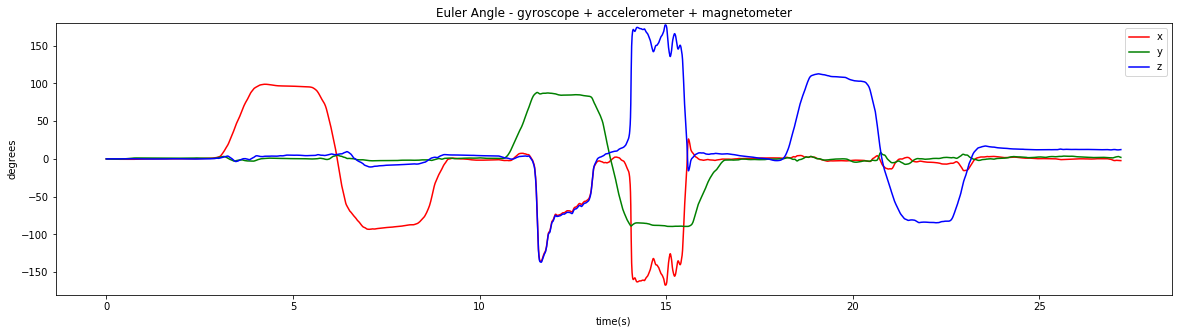

In [463]:
gyroscope_radians = deg2radians(gyroscope_data)
n = imu_data.shape[0]

q_imu_gyro_acc_magn = imu_gyro(n, gyroscope_radians)

euler_imu_gyro_acc_magn = np.apply_along_axis(toEulerAngle, 2, q_imu_gyro_acc_magn)
euler_imu_gyro_acc_magn = np.apply_along_axis(np.rad2deg, 2, euler_imu_gyro_acc_magn)

plt.clf()
time = imu_data['time'].values
plt.figure(figsize=(20,5))
plt.ylim(-180,180)
plt.xlabel('time(s)')
plt.ylabel('degrees')
plt.title('Euler Angle - gyroscope + accelerometer + magnetometer')
xdata = []
ydata = []
zdata = []
for row in euler_imu_gyro_acc_magn:
    xdata += [row[0][0]]
    ydata += [row[0][1]]
    zdata += [row[0][2]]
plt.plot(time, xdata, linestyle='-', color='r', label='x')
plt.plot(time, ydata, linestyle='-', color='g', label='y')
plt.plot(time, zdata, linestyle='-', color='b', label='z')
plt.legend(loc='upper right')

In [25]:
def imu_gyro_v2(n, gyroscope_data, 
                      dt=0.003906):
    '''
        Parameters
        ----------
        n: scalar
          number of data for all readings, ex. imu_data.shape[0]
        gyroscope_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a gyroscope
        dt: scalar
          observations reported rate in seconds, ex. dt = 265Hz = 0.003906s

        Return
        ----------
        q: a matrix with n rows and 4 columns
          orientations estimated for all n readings after applying tilt and yaw drift corrections
    '''

    q = [np.array([[1.0,0,0,0]])]
    for i in range(n):
        ### gyroscope estimations
        gyro_row = gyroscope_data.loc[i]
        q_gyro = np.array([[0, -gyro_row['x'], -gyro_row['y'], -gyro_row['z']]])
        q_dot = 0.5 * quaternions_product(q_gyro, q[i])
        q_k = np.add(q[i], q_dot * dt)
        q_k = np.divide(q_k, np.sqrt(np.sum(np.square(q_k)))) #normalize
        q += [q_k]
    
    # return result excluding the identity quaternion used for initial estimations
    return np.array(q[1:])

In [27]:
gyroscope_radians = deg2radians(gyroscope_data)
n = imu_data.shape[0]

imu_gyro(n, gyroscope_radians)

array([[[ 9.99999998e-01,  3.19558878e-05,  4.26078503e-05,
         -2.98254952e-05]],

       [[ 9.99999993e-01,  6.39117754e-05,  8.52157005e-05,
         -5.96509904e-05]],

       [[ 9.99999982e-01,  9.58645765e-05,  1.49128837e-04,
         -6.81739218e-05]],

       ...,

       [[ 9.93898441e-01,  2.14084281e-02, -1.61327660e-02,
         -1.06992069e-01]],

       [[ 9.93877907e-01,  2.14031832e-02, -1.56499547e-02,
         -1.07255246e-01]],

       [[ 9.93855254e-01,  2.14061131e-02, -1.52050223e-02,
         -1.07528225e-01]]])

# PROBLEM 3

## Gravity based tilt correction using the accelerometer

Transform acceleration measurements into the global frame
$$\hat{u} = q^{-1}_{k} \otimes \tilde{a} \otimes q_{k}$$
$\hat{u}$ is a direct estimate of the gravity vector, $q^{-1}_k$ will be quaternion conjugate as q is assumed to be a  unit quaternion  
To calculate the axis, project $\hat{u}$ into the XZ plane to obtain $(\hat{u}_x,0,\hat{u}_z)$. The tilt axis is orthogonal: $t = (\hat{u}_z,0,−\hat{u}_x)$  
The tilt error φ is the angle between $\hat{u}$ and the vector (0, 1, 0).  
The output of the complementary filter with gain $\alpha\ll1$ is
$$q_{k}' = q(t, -\alpha\phi) \otimes q_{k}$$
in which t is the tilt axis. The parameter $\alpha$ should be large enough to correct all drift, but small enough so that the corrections are imperceptible to the user.

In [368]:
def imu_gyro_acc(n, gyroscope_data, accelerometer_data,
                      dt=0.003906, alpha=1e-05):
    '''
        Parameters
        ----------
        n: scalar
          number of data for all readings, ex. imu_data.shape[0]
        gyroscope_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a gyroscope
        accelerometer_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a accelerometer, observations must be normalized
        dt: scalar
          observations reported rate in seconds, ex. dt = 265Hz = 0.003906s
        alpha: scalar
          parameter used for tilt correction

        Return
        ----------
        q: a matrix with n rows and 4 columns
          orientations estimated for all n readings after applying tilt and yaw drift corrections
    '''
    up = []
    q = [np.array([[1.0,0,0,0]])]
    for i in range(n):
        ### gyroscope estimations
        gyro_row = gyroscope_data.loc[i]
        # w_k = (pitch, yaw, roll)
        w_k = np.array([[gyro_row['y'], gyro_row['z'], gyro_row['x']]]) # because of the different axis following imu paper
        l = np.sqrt(np.sum(np.square(w_k)))
        v = np.divide(w_k, l)
        theta = l * dt 
        q_gyro = axisAngle2quaternion(v, theta)
        q_k = quaternions_product(q[i], q_gyro) # the book have the product swapped between those two

        ### accelerometer estimations - tilt error correction (define up vector)
        q_conj = quaternions_conjugate(q_k)
        acc_row = accelerometer_data.loc[i]
        a = np.array([[0, acc_row['y'], acc_row['z'], acc_row['x']]])
        u = quaternions_product(q_conj, quaternions_product(a, q_k)) # global frame q_k is actually the conjugate
        t = np.array([[u[0][3], 0, -u[0][1]]]) # tilt axis
        phi = math.acos(np.dot(np.array([0, 1, 0]), u[0][1:])) # tilt error angle
        q_t = axisAngle2quaternion(t, -alpha*phi) # q(t, -alpha*phi) for tilt drift
        q_k = quaternions_product(q_t, q_k) # apply complementary filter for tilt drift correction  
        q_k = np.divide(q_k, np.sqrt(np.sum(np.square(q_k)))) #normalize
        q += [q_k]
    
    # return result excluding the identity quaternion used for initial estimations
    q = np.array(q[1:])
    q[:,:,[1,2]] = q[:,:,[2,1]]
    q[:,:,[1,3]] = q[:,:,[3,1]]
    
    return q

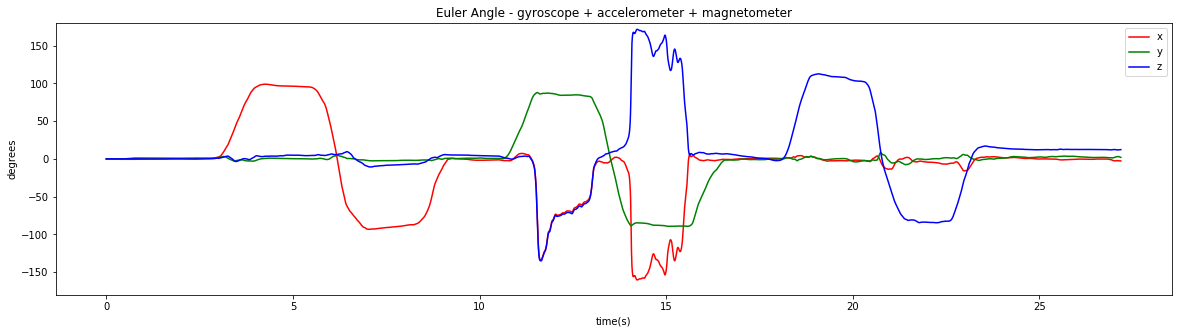

In [464]:
gyroscope_radians = deg2radians(gyroscope_data)
accelerometer_radians = deg2radians(accelerometer_data)
accelerometer_narmalized = data_normalized(accelerometer_radians)
n = imu_data.shape[0]

q_imu_gyro_acc_magn = imu_gyro_acc(n, gyroscope_radians, accelerometer_narmalized)

euler_imu_gyro_acc_magn = np.apply_along_axis(toEulerAngle, 2, q_imu_gyro_acc_magn)
euler_imu_gyro_acc_magn = np.apply_along_axis(np.rad2deg, 2, euler_imu_gyro_acc_magn)

plt.clf()
time = imu_data['time'].values
plt.figure(figsize=(20,5))
plt.ylim(-180,180)
plt.xlabel('time(s)')
plt.ylabel('degrees')
plt.title('Euler Angle - gyroscope + accelerometer + magnetometer')
xdata = []
ydata = []
zdata = []
for row in euler_imu_gyro_acc_magn:
    xdata += [row[0][0]]
    ydata += [row[0][1]]
    zdata += [row[0][2]]
plt.plot(time, xdata, linestyle='-', color='r', label='x')
plt.plot(time, ydata, linestyle='-', color='g', label='y')
plt.plot(time, zdata, linestyle='-', color='b', label='z')
plt.legend(loc='upper right')

Implementation following **An effient orientation filter for inertial and inertial/magnetic sensor arrays** paper

In [140]:
def imu_gyro_acc_v2(n, gyroscope_data, accelerometer_data,
                      dt=0.003906, beta=0.1):
    '''
        Parameters
        ----------
        n: scalar
          number of data for all readings, ex. imu_data.shape[0]
        gyroscope_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a gyroscope
        accelerometer_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a accelerometer, observations must be normalized
        dt: scalar
          observations reported rate in seconds, ex. dt = 265Hz = 0.003906s
        beta: scalar
          parameter used for error correction

        Return
        ----------
        q: a matrix with n rows and 4 columns
          orientations estimated for all n readings after applying tilt and yaw drift corrections
    '''

    q = [np.array([[1.0,0,0,0]])]
    for i in range(n):
        ### gyroscope estimations
        gyro_row = gyroscope_data.loc[i]
        q_gyro = np.array([[0, -gyro_row['x'], -gyro_row['y'], -gyro_row['z']]])
        q_dot = 0.5 * quaternions_product(q_gyro, q[i])
        
        acc_row = accelerometer_data.loc[i]
        
        a_x, a_y, a_z = acc_row['x'], acc_row['y'], acc_row['z']
        q_1, q_2, q_3, q_4 = q[i][0]
        q1q2 = q_1 * q_2
        q1q3 = q_1 * q_3
        q2q2 = q_2 * q_2
        q2q3 = q_2 * q_3
        q2q4 = q_2 * q_4
        q3q3 = q_3 * q_3
        q3q4 = q_3 * q_4
        q4q4 = q_4 * q_4
        
        f_g = np.array([[2*(q2q4 - q1q3) - a_x], 
                        [2*(q1q2 + q3q4) - a_y],
                        [2*(0.5 - q2q2 - q3q3) - a_z]
                       ], dtype=np.float64)
        
        j_g = np.array([[-2*q_3, 2*q_4, -2*q_1, 2*q_2],
                        [2*q_2, 2*q_1, 2*q_4, 2*q_3],
                        [0, -4*q_2, -4*q_3, 0]
                       ], dtype=np.float64)
        
        gradient_f = np.dot(j_g.T, f_g).T
        magnitude_gradient_f = np.sqrt(np.sum(np.square(gradient_f)))
        
        q_e = np.divide(gradient_f, magnitude_gradient_f)
        
        q_dot = np.subtract(q_dot, beta * q_e)
        
        q_k = np.add(q[i], q_dot * dt)
        q_k = np.divide(q_k, np.sqrt(np.sum(np.square(q_k)))) #normalize
        
        q += [q_k]
    
    # return result excluding the identity quaternion used for initial estimations
    return np.array(q[1:])

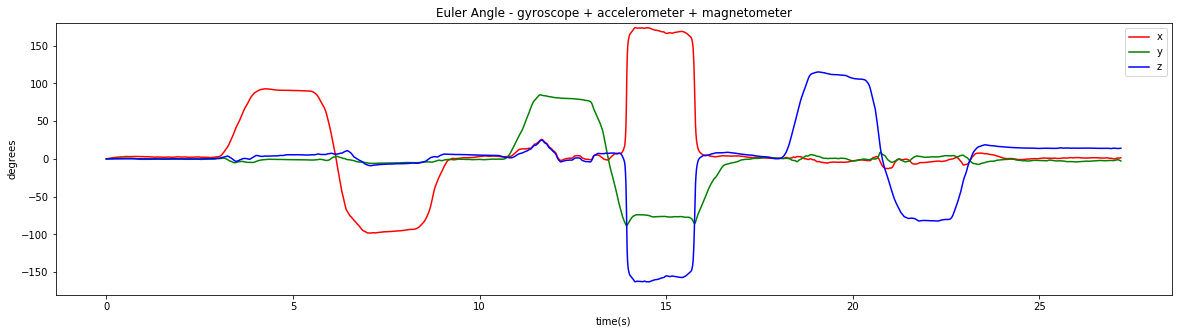

In [465]:
gyroscope_radians = deg2radians(gyroscope_data)
accelerometer_radians = deg2radians(accelerometer_data)
accelerometer_narmalized = data_normalized(accelerometer_radians)
n = imu_data.shape[0]

q_imu_gyro_acc_magn = imu_gyro_acc_v2(n, gyroscope_radians, accelerometer_narmalized)

euler_imu_gyro_acc_magn = np.apply_along_axis(quaternions2euler, 2, q_imu_gyro_acc_magn)
euler_imu_gyro_acc_magn = np.apply_along_axis(np.rad2deg, 2, euler_imu_gyro_acc_magn)

plt.clf()
time = imu_data['time'].values
plt.figure(figsize=(20,5))
plt.ylim(-180,180)
plt.xlabel('time(s)')
plt.ylabel('degrees')
plt.title('Euler Angle - gyroscope + accelerometer + magnetometer')
xdata = []
ydata = []
zdata = []
for row in euler_imu_gyro_acc_magn:
    xdata += [row[0][0]]
    ydata += [row[0][1]]
    zdata += [row[0][2]]
plt.plot(time, xdata, linestyle='-', color='r', label='x')
plt.plot(time, ydata, linestyle='-', color='g', label='y')
plt.plot(time, zdata, linestyle='-', color='b', label='z')
plt.legend(loc='upper right')

# PROBLEM 4

## Yaw drift

The complementary filter for yaw correction is
$$q_{k}' = q((0,1,0), -\alpha_2(\theta - \theta_r)) \otimes q_{k}$$
in which $\alpha_2$ is a small gain constant, similar to the case of tilt correction.

In [466]:
def imu_gyro_acc_magn(n, gyroscope_data, accelerometer_data, magnetometer_data,
                      dt=0.003906, alpha=1e-05, alpha_2=5e-05):
    '''
        Parameters
        ----------
        n: scalar
          number of data for all readings, ex. imu_data.shape[0]
        gyroscope_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a gyroscope
        accelerometer_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a accelerometer, observations must be normalized
        magnetometer_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a magnetometer, observations must be normalized
        dt: scalar
          observations reported rate in seconds, ex. dt = 265Hz = 0.003906s
        alpha: scalar
          parameter used for tilt correction
        alpha_2: scalar 
          parameter used for yaw drift correction
        eps: scalar 
          epsilon used for detecting yaw drift

        Return
        ----------
        q: a matrix with n rows and 4 columns
          orientations estimated for all n readings after applying tilt and yaw drift corrections
    ''' 
    n_ref = 1
    q = [np.array([[1.0,0,0,0]])]
    for i in range(n):
        ### gyroscope estimations
        gyro_row = gyroscope_data.loc[i]
        # w_k = (pitch, yaw, roll)
        w_k = np.array([[gyro_row['y'], gyro_row['z'], gyro_row['x']]]) # because of the different axis following imu paper
        l = np.sqrt(np.sum(np.square(w_k)))
        v = np.divide(w_k, l)
        theta = l * dt 
        q_gyro = axisAngle2quaternion(v, theta)
        q_k = quaternions_product(q[i], q_gyro) # the book have the product swapped between those two

        ### accelerometer estimations - tilt error correction (define up vector)
        q_conj = quaternions_conjugate(q_k)
        acc_row = accelerometer_data.loc[i]
        a = np.array([[0, acc_row['y'], acc_row['z'], acc_row['x']]])
        u = quaternions_product(q_conj, quaternions_product(a, q_k)) # global frame q_k is actually the conjugate
        t = np.array([[u[0][3], 0, -u[0][1]]]) # tilt axis
        phi = math.acos(np.dot(np.array([0, 1, 0]), u[0][1:])) # tilt error angle
        q_t = axisAngle2quaternion(t, -alpha*phi) # q(t, -alpha*phi) for tilt drift
        q_k = quaternions_product(q_t, q_k) # apply complementary filter for tilt drift correction  

        ### magnetometer estimations - yaw drift correction
        q_conj = quaternions_conjugate(q_k)
        
        # avgerage last 10 readings m_ref readings (for the first 10 inputs this will be the same value)
        m_row = magnetometer_data.loc[i]
        
        if (i < n_ref):
            m_ref = np.array([[0, m_row['y'], m_row['z'], m_row['x']]])
            q_ref = q_k
            m_r = quaternions_product(q_conj, quaternions_product(m_ref, q_k)) # estimate by world frame
            theta_ref = math.atan2(m_r[0][1], m_r[0][3])
        else:
            m_obv = np.array([[0, m_row['y'], m_row['z'], m_row['x']]]) # observed magnetometer reading

            m = quaternions_product(q_conj, quaternions_product(m_obv, q_k)) # estimate by world frame
            theta_m = math.atan2(m[0][1], m[0][3])

            q_m = axisAngle2quaternion(np.array([[0, 1, 0]]), -alpha_2*(theta_m - theta_ref)) # complementry filter for yaw drift
            
            # to detect yaw drift q and q_ref must be close
#             if np.allclose(q_ref, q_k, rtol=1e-01, atol=1e-02):
            q_k = quaternions_product(q_m, q_k)
            
        q_k = np.divide(q_k, np.sqrt(np.sum(np.square(q_k)))) #normalize

        q += [q_k]
    
    # return result excluding the identity quaternion used for initial estimations
    q = np.array(q[1:])
    q[:,:,[1,2]] = q[:,:,[2,1]]
    q[:,:,[1,3]] = q[:,:,[3,1]]
    
    return q

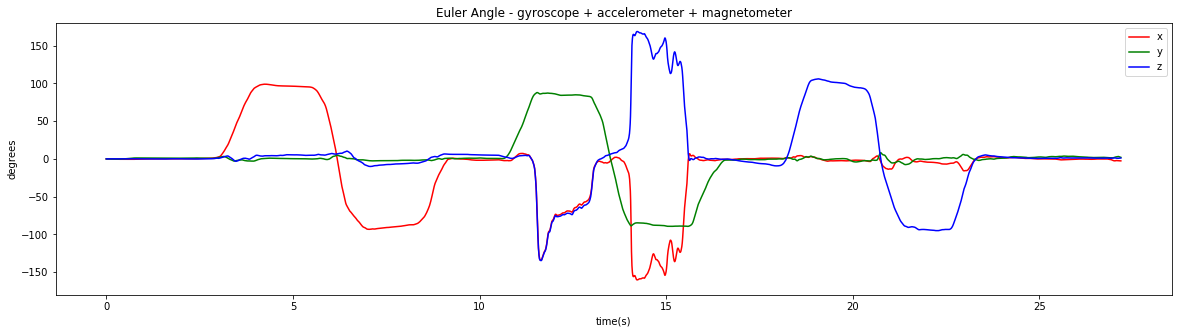

In [462]:
gyroscope_radians = deg2radians(gyroscope_data)
accelerometer_radians = deg2radians(accelerometer_data)
magnetometer_radians = deg2radians(magnetometer_data)

accelerometer_narmalized = data_normalized(accelerometer_radians)
magnetometer_narmalized = data_normalized(magnetometer_radians)
n = imu_data.shape[0]

q_imu_gyro_acc_magn = imu_gyro_acc_magn(n, gyroscope_radians, accelerometer_narmalized, magnetometer_narmalized)

euler_imu_gyro_acc_magn = np.apply_along_axis(toEulerAngle, 2, q_imu_gyro_acc_magn)
euler_imu_gyro_acc_magn = np.apply_along_axis(np.rad2deg, 2, euler_imu_gyro_acc_magn)

plt.clf()
time = imu_data['time'].values
plt.figure(figsize=(20,5))
plt.ylim(-180,180)
plt.xlabel('time(s)')
plt.ylabel('degrees')
plt.title('Euler Angle - gyroscope + accelerometer + magnetometer')
xdata = []
ydata = []
zdata = []
for row in euler_imu_gyro_acc_magn:
    xdata += [row[0][0]]
    ydata += [row[0][1]]
    zdata += [row[0][2]]
plt.plot(time, xdata, linestyle='-', color='r', label='x')
plt.plot(time, ydata, linestyle='-', color='g', label='y')
plt.plot(time, zdata, linestyle='-', color='b', label='z')
plt.legend(loc='upper right')

Implementation following **An effient orientation filter for inertial and inertial/magnetic sensor arrays** paper

In [142]:
def imu_gyro_acc_magn_v2(n, gyroscope_data, accelerometer_data, magnetometer_data,
                      dt=0.003906, beta=0.1):
    '''
        Parameters
        ----------
        n: scalar
          number of data for all readings, ex. imu_data.shape[0]
        gyroscope_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a gyroscope
        accelerometer_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a accelerometer, observations must be normalized
        magnetometer_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a magnetometer, observations must be normalized
        dt: scalar
          observations reported rate in seconds, ex. dt = 265Hz = 0.003906s
        beta: scalar
          parameter used for tilt correction
        alpha_2: scalar 
          parameter used for yaw drift correction
        eps: scalar 
          epsilon used for detecting yaw drift

        Return
        ----------
        q: a matrix with n rows and 4 columns
          orientations estimated for all n readings after applying tilt and yaw drift corrections
    '''

    q = [np.array([[1.0,0,0,0]])]
    for i in range(n):
        ### gyroscope estimations
        gyro_row = gyroscope_data.loc[i]
        q_gyro = np.array([[0, -gyro_row['x'], -gyro_row['y'], -gyro_row['z']]])
        q_dot = 0.5 * quaternions_product(q_gyro, q[i])
        
        q_conj = quaternions_conjugate(q[i])
        
        magn_row = magnetometer_data.loc[i]
        m_x, m_y, m_z = magn_row['x'], magn_row['y'], magn_row['z']
        m = np.array([[0, m_x, m_y, m_z]])
        h_t = quaternions_product(q[i], quaternions_product(m, q_conj))
        _, h_x, h_y, h_z = h_t[0]
        # b_t = [0 sqrt(square(h_x) + square(h_y)) 0 h_z]
        b_x = np.sqrt(np.sum(np.square([h_x, h_y])))
        b_z = h_z
        
        acc_row = accelerometer_data.loc[i]
        a_x, a_y, a_z = acc_row['x'], acc_row['y'], acc_row['z']
        
        q_1, q_2, q_3, q_4 = q[i][0]
        q1q2 = q_1 * q_2
        q1q3 = q_1 * q_3
        q1q4 = q_1 * q_4
        q2q2 = q_2 * q_2
        q2q3 = q_2 * q_3
        q2q4 = q_2 * q_4
        q3q3 = q_3 * q_3
        q3q4 = q_3 * q_4
        q4q4 = q_4 * q_4
        
        f_g = np.array([[2*(q2q4 - q1q3) - a_x], 
                        [2*(q1q2 + q3q4) - a_y],
                        [2*(0.5 - q2q2 - q3q3) - a_z]
                       ], dtype=np.float64)
        
        j_g = np.array([[-2*q_3, 2*q_4, -2*q_1, 2*q_2],
                        [2*q_2, 2*q_1, 2*q_4, 2*q_3],
                        [0, -4*q_2, -4*q_3, 0]
                       ], dtype=np.float64)
        
        f_b = np.array([[2*b_x*(0.5 - q3q3 - q4q4) + 2*b_z*(q2q4 - q1q3) - m_x], 
                        [2*b_x*(q2q3 - q1q4) + 2*b_z*(q1q2 + q3q4) - m_y],
                        [2*b_x*(q1q3 + q2q4) + 2*b_z*(0.5 - q2q2 - q3q3) - m_z]
                       ], dtype=np.float64)
        
        j_b = np.array([[-2*b_z*q_3, 2*b_z*q_4, -4*b_x*q_3 - 2*b_z*q_1, -4*b_x*q_4 + 2*b_z*q_2],
                        [-2*b_x*q_4 + 2*b_z*q_2, 2*b_x*q_3 + 2*b_z*q_1, 2*b_x*q_2 + 2*b_z*q_4, -2*b_x*q_1 + 2*b_z*q_3],
                        [2*b_x*q_3, 2*b_x*q_4 - 4*b_z*q_2, 2*b_x*q_1 - 4*b_z*q_3, 2*b_x*q_2]
                       ], dtype=np.float64)
        
        f = np.append(f_g, f_b, axis=0)
        j = np.append(j_g, j_b, axis=0)
        
        gradient_f = np.dot(j.T, f).T
        magnitude_gradient_f = np.sqrt(np.sum(np.square(gradient_f)))
        
        q_e = np.divide(gradient_f, magnitude_gradient_f)
        
        q_dot = np.subtract(q_dot, beta * q_e)
        
        q_k = np.add(q[i], q_dot * dt)
        q_k = np.divide(q_k, np.sqrt(np.sum(np.square(q_k)))) #normalize
        
        q += [q_k]
    
    # return result excluding the identity quaternion used for initial estimations
    return np.array(q[1:])

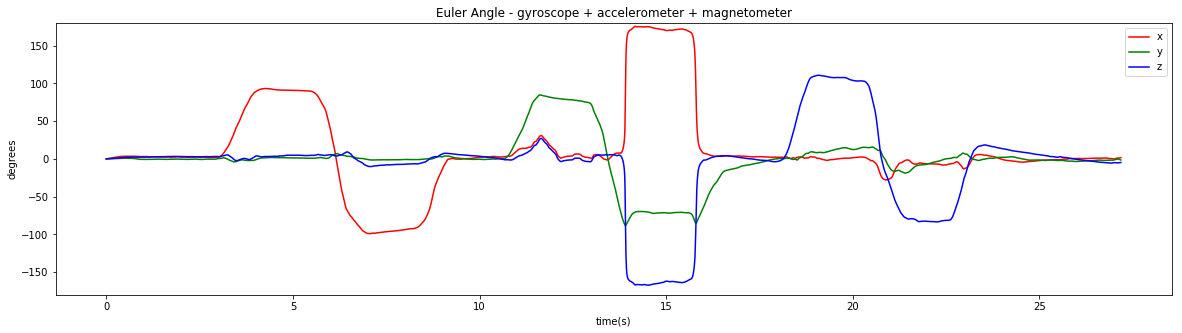

In [461]:
gyroscope_radians = deg2radians(gyroscope_data)
accelerometer_radians = deg2radians(accelerometer_data)
magnetometer_radians = deg2radians(magnetometer_data)

accelerometer_narmalized = data_normalized(accelerometer_radians)
magnetometer_narmalized = data_normalized(magnetometer_radians)
n = imu_data.shape[0]

q_imu_gyro_acc_magn = imu_gyro_acc_magn_v2(n, gyroscope_radians, accelerometer_narmalized, magnetometer_narmalized)

euler_imu_gyro_acc_magn = np.apply_along_axis(quaternions2euler, 2, q_imu_gyro_acc_magn)
euler_imu_gyro_acc_magn = np.apply_along_axis(np.rad2deg, 2, euler_imu_gyro_acc_magn)

plt.clf()
time = imu_data['time'].values
plt.figure(figsize=(20,5))
plt.ylim(-180,180)
plt.xlabel('time(s)')
plt.ylabel('degrees')
plt.title('Euler Angle - gyroscope + accelerometer + magnetometer')
xdata = []
ydata = []
zdata = []
for row in euler_imu_gyro_acc_magn:
    xdata += [row[0][0]]
    ydata += [row[0][1]]
    zdata += [row[0][2]]
plt.plot(time, xdata, linestyle='-', color='r', label='x')
plt.plot(time, ydata, linestyle='-', color='g', label='y')
plt.plot(time, zdata, linestyle='-', color='b', label='z')
plt.legend(loc='upper right')

# PROBLEM 5

## 2D plots of initial data

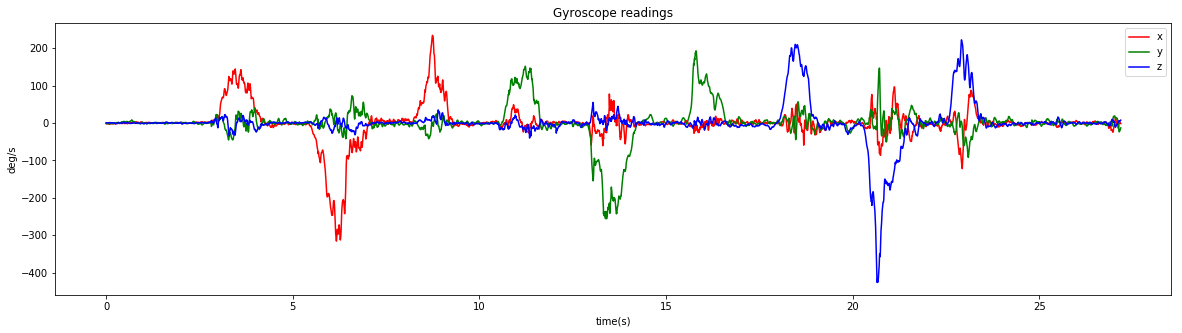

In [439]:
plt.clf()

time = imu_data['time'].values
plt.figure(figsize=(20,5))
plt.xlabel('time(s)')
plt.ylabel('deg/s')
plt.title('Gyroscope readings')
xdata = gyroscope_data['x'].values
ydata = gyroscope_data['y'].values
zdata = gyroscope_data['z'].values
plt.plot(time, xdata, linestyle='-', color='r', label='x')
plt.plot(time, ydata, linestyle='-', color='g', label='y')
plt.plot(time, zdata, linestyle='-', color='b', label='z')
plt.legend(loc='upper right')
plt.savefig('gyroscope_readings.png')

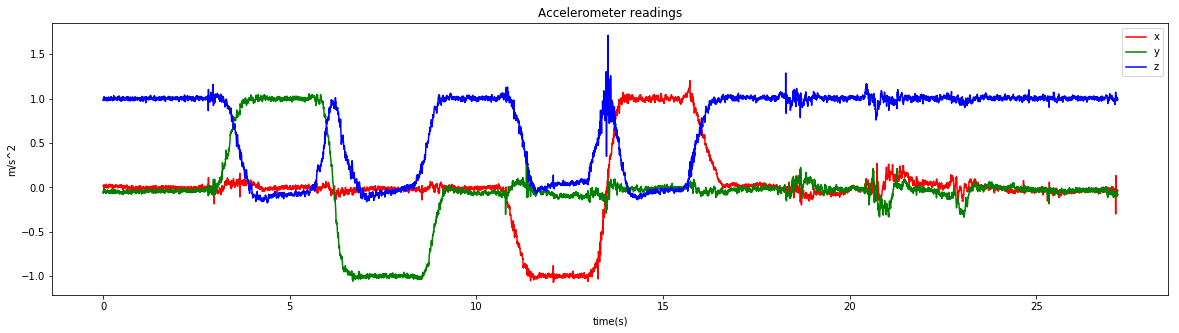

In [440]:
plt.clf()

time = imu_data['time'].values
plt.figure(figsize=(20,5))
plt.xlabel('time(s)')
plt.ylabel('m/s^2')
plt.title('Accelerometer readings')
xdata = accelerometer_data['x'].values
ydata = accelerometer_data['y'].values
zdata = accelerometer_data['z'].values
plt.plot(time, xdata, linestyle='-', color='r', label='x')
plt.plot(time, ydata, linestyle='-', color='g', label='y')
plt.plot(time, zdata, linestyle='-', color='b', label='z')
plt.legend(loc='upper right')
plt.savefig('accelerometer_readings.png')

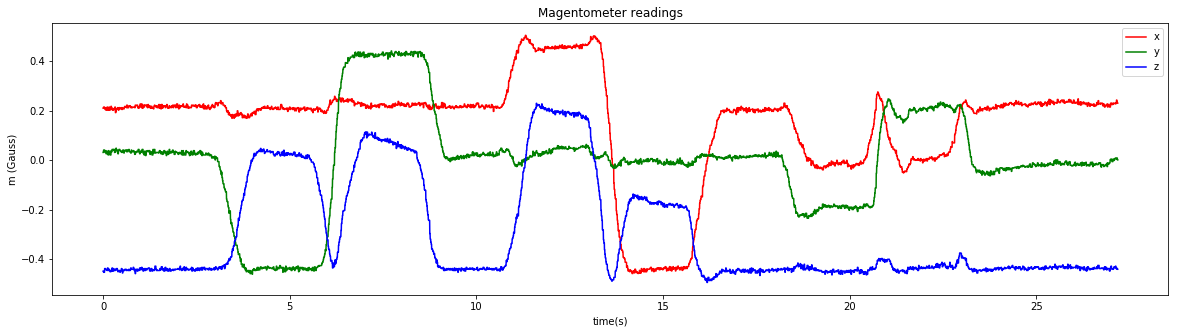

In [438]:
plt.clf()

time = imu_data['time'].values
plt.figure(figsize=(20,5))
plt.xlabel('time(s)')
plt.ylabel('m (Gauss)')
plt.title('Magentometer readings')
xdata = magnetometer_data['x'].values
ydata = magnetometer_data['y'].values
zdata = magnetometer_data['z'].values
plt.plot(time, xdata, linestyle='-', color='r', label='x')
plt.plot(time, ydata, linestyle='-', color='g', label='y')
plt.plot(time, zdata, linestyle='-', color='b', label='z')
plt.legend(loc='upper right')

plt.savefig('magentometer_readings.png')

## 2D plots for Euler angles for the 3 implemented methods (gyroscope integration, gyroscope + accelerometer, gyroscope + accelerometer + magnetometer)

In [457]:
gyroscope_radians = deg2radians(gyroscope_data)
accelerometer_radians = deg2radians(accelerometer_data)
magnetometer_radians = deg2radians(magnetometer_data)
accelerometer_narmalized = data_normalized(accelerometer_radians)
magnetometer_narmalized = data_normalized(magnetometer_radians)
n = imu_data.shape[0]

q_imu_gyro = imu_gyro(n, gyroscope_radians)
q_imu_gyro_acc = imu_gyro_acc(n, gyroscope_radians, accelerometer_narmalized)
q_imu_gyro_acc_magn = imu_gyro_acc_magn(n, gyroscope_radians, accelerometer_narmalized, magnetometer_narmalized)

In [458]:
# convert quaternions to euler angles
euler_imu_gyro = np.apply_along_axis(toEulerAngle, 2, q_imu_gyro)
euler_imu_gyro_acc = np.apply_along_axis(toEulerAngle, 2, q_imu_gyro_acc)
euler_imu_gyro_acc_magn = np.apply_along_axis(toEulerAngle, 2, q_imu_gyro_acc_magn)

# computed euler angles are in randians so convert them to degrees
euler_imu_gyro = np.apply_along_axis(np.rad2deg, 2, euler_imu_gyro)
euler_imu_gyro_acc = np.apply_along_axis(np.rad2deg, 2, euler_imu_gyro_acc)
euler_imu_gyro_acc_magn = np.apply_along_axis(np.rad2deg, 2, euler_imu_gyro_acc_magn)

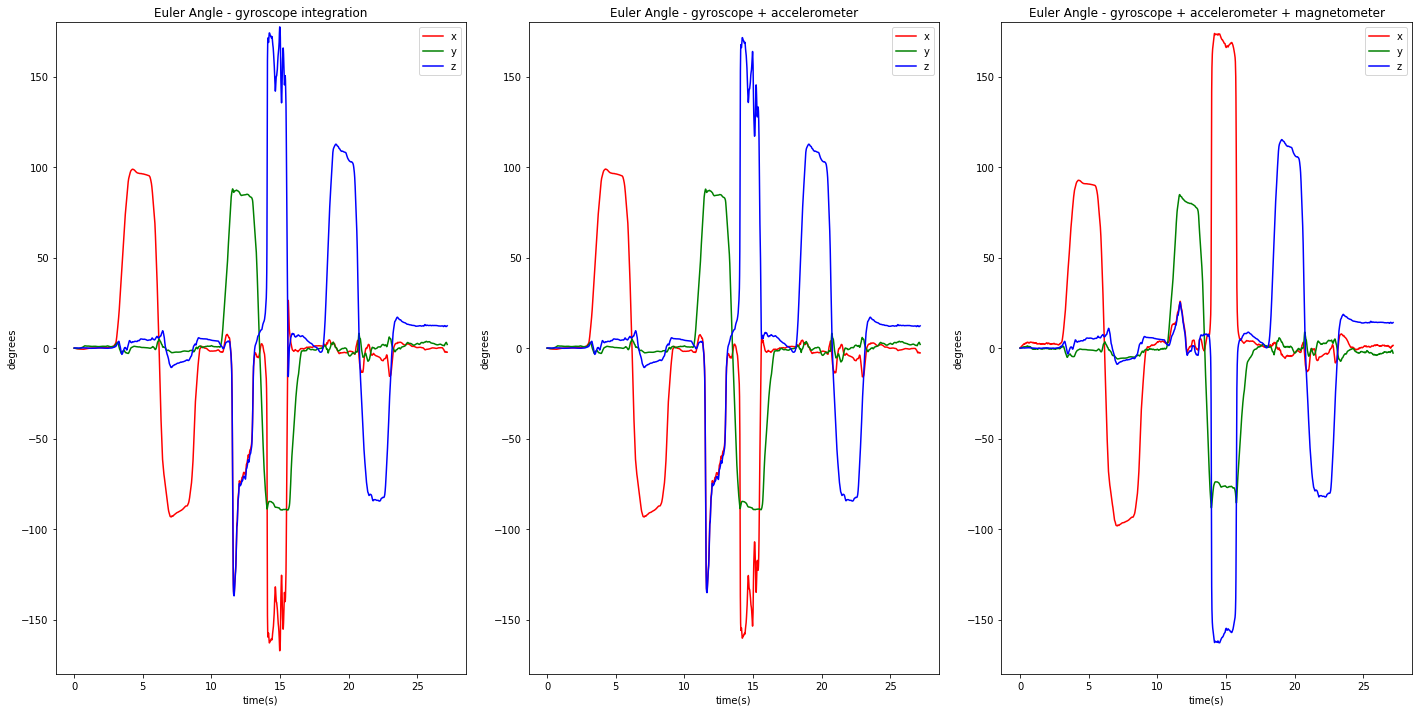

In [469]:
plt.clf()

time = imu_data['time'].values

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
# make a little extra space between the subplots
fig.subplots_adjust(hspace=2)

plt.figure(figsize=(20,10))
ax1.set_ylim(-180,180)
ax1.set_xlabel('time(s)')
ax1.set_ylabel('degrees')
ax1.set_title('Euler Angle - gyroscope integration')
xdata = []
ydata = []
zdata = []
for row in euler_imu_gyro:
    xdata += [row[0][0]]
    ydata += [row[0][1]]
    zdata += [row[0][2]]
ax1.plot(time, xdata, linestyle='-', color='r', label='x')
ax1.plot(time, ydata, linestyle='-', color='g', label='y')
ax1.plot(time, zdata, linestyle='-', color='b', label='z')
ax1.legend(loc='upper right')

ax2.set_ylim(-180,180)
ax2.set_xlabel('time(s)')
ax2.set_ylabel('degrees')
ax2.set_title('Euler Angle - gyroscope + accelerometer')
xdata = []
ydata = []
zdata = []
for row in euler_imu_gyro_acc:
    xdata += [row[0][0]]
    ydata += [row[0][1]]
    zdata += [row[0][2]]
ax2.plot(time, xdata, linestyle='-', color='r', label='x')
ax2.plot(time, ydata, linestyle='-', color='g', label='y')
ax2.plot(time, zdata, linestyle='-', color='b', label='z')
ax2.legend(loc='upper right')

ax3.set_ylim(-180,180)
ax3.set_xlabel('time(s)')
ax3.set_ylabel('degrees')
ax3.set_title('Euler Angle - gyroscope + accelerometer + magnetometer')
xdata = []
ydata = []
zdata = []
for row in euler_imu_gyro_acc_magn:
    xdata += [row[0][0]]
    ydata += [row[0][1]]
    zdata += [row[0][2]]
ax3.plot(time, xdata, linestyle='-', color='r', label='x')
ax3.plot(time, ydata, linestyle='-', color='g', label='y')
ax3.plot(time, zdata, linestyle='-', color='b', label='z')
ax3.legend(loc='upper right')

fig.tight_layout()

fig.savefig('euler_all.png')